In [1]:
# predict Eh or pe?
pred <- "pe"

table_name <- "table - alkyl chain predicted"
fig_scatter_name <- "scatterplot - alkyl chain predicted"

monte_iter <- 99
seed <- 201130

# during monte carlo, fully randomize lipid peak areas?
# default is FALSE, where peak areas are allowed to vary by 30% and RF by 100x
# when set to TRUE, randomizes peak areas between 0 and 1 and ignores RF.
# Monte-carlo related plots, tables, and objects are affected
# (e.g. IPL_OBIGT.csv, boxplots, and some rds files)
# Lineplots, scatterplots, and tables are unaffected by full_random.
full_random <- TRUE

source("scripts//IPL_misc_func.r")
source("scripts//findHKF.r")
source("scripts//IPL_functions.r")
source("scripts//IPL_thermo_func.r")
source("scripts//IPL_predict.r")


Warning message:
"package 'scales' was built under R version 4.0.2"
Warning message:
"package 'readxl' was built under R version 4.0.2"


[1] "Misc. functions loaded..."
[1] "findHKF loaded..."


Warning message:
"package 'CHNOSZ' was built under R version 4.0.2"


[1] "IPL functions loaded..."
[1] "Thermo functions loaded"


Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following object is masked from 'package:CHNOSZ':

    slice


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Warning message:
"package 'reshape2' was built under R version 4.0.2"
Warning message:
"package 'ggplot2' was built under R version 4.0.3"


[1] "Creating line plot for BP1"
   user  system elapsed 
  14.34    0.02   14.61 
[1] "finished monte carlo iterations for BP1"
   user  system elapsed 
  54.07    2.75   57.39 
[1] "Creating line plot for BP2"
   user  system elapsed 
  13.86    0.00   13.86 
[1] "finished monte carlo iterations for BP2"
   user  system elapsed 
  53.64    2.68   56.87 
[1] "Creating line plot for BP3"
   user  system elapsed 
  14.17    0.02   14.23 
[1] "finished monte carlo iterations for BP3"
   user  system elapsed 
  53.89    2.70   57.24 
[1] "Creating line plot for BP4"
   user  system elapsed 
  13.56    0.00   13.59 
[1] "finished monte carlo iterations for BP4"
   user  system elapsed 
  54.13    2.92   57.66 
[1] "Creating line plot for BP5"
   user  system elapsed 
  13.97    0.00   13.97 
[1] "finished monte carlo iterations for BP5"
   user  system elapsed 
  53.89    2.92   57.33 
[1] "Creating line plot for BP6"
   user  system elapsed 
  13.94    0.01   13.97 
[1] "finished monte ca

In [2]:
# join environmental redox vals with alkyl-prediced redox vals
library("plyr")

geo <- readRDS(paste0("rds//geo_", pred, ".rds"))
df_redox <- geo[["report"]][, c("Temperature_degC", "H+_pH", "O2/H2O", "NO2-/NO3-", "NH4+/NO3-", "HS-/SO4-2")]
### also possible: 'CO/HCO3-', 'H2/H2O', 'METHANE/HCO3-'
colnames(df_redox)[1:3] <- c("TempC", "pH", "O2_AQ/H2O")
df_redox[, "sample"] <- rownames(df_redox)
df_redox <- df_redox[, c("sample", "TempC", "pH", "O2_AQ/H2O", "NO2-/NO3-", "NH4+/NO3-", "HS-/SO4-2")]

lip_redox <- read.csv(paste0("table - alkyl chain predicted ", pred, ".csv"))
write.csv(join(df_redox, lip_redox, by="sample"), paste0("lip_", pred, ".csv"), row.names=FALSE, na = "")

# plot redox vs. alkyl-redox
source("scripts//scatterplot - alkyl chain predicted redox.r")

Warning message in strwidth(legend, units = "user", cex = cex, font = text.font):
"font metrics unknown for character 0xa"
Warning message in strwidth(legend, units = "user", cex = cex, font = text.font):
"font metrics unknown for character 0xa"
Warning message in strheight(legend, units = "user", cex = cex):
"font metrics unknown for character 0xa"
Warning message in strheight(legend, units = "user", cex = cex):
"font metrics unknown for character 0xa"
Warning message in text.default(x, y, ...):
"font metrics unknown for character 0xa"
Warning message in text.default(x, y, ...):
"font metrics unknown for character 0xa"
Warning message in text.default(x, y, ...):
"font metrics unknown for character 0xa"
Warning message in text.default(x, y, ...):
"font metrics unknown for character 0xa"
Warning message in strwidth(legend, units = "user", cex = cex, font = text.font):
"font metrics unknown for character 0xa"
Warning message in strwidth(legend, units = "user", cex = cex, font = text.font

[1] "TempC r-squared p: 0.444444444444444"


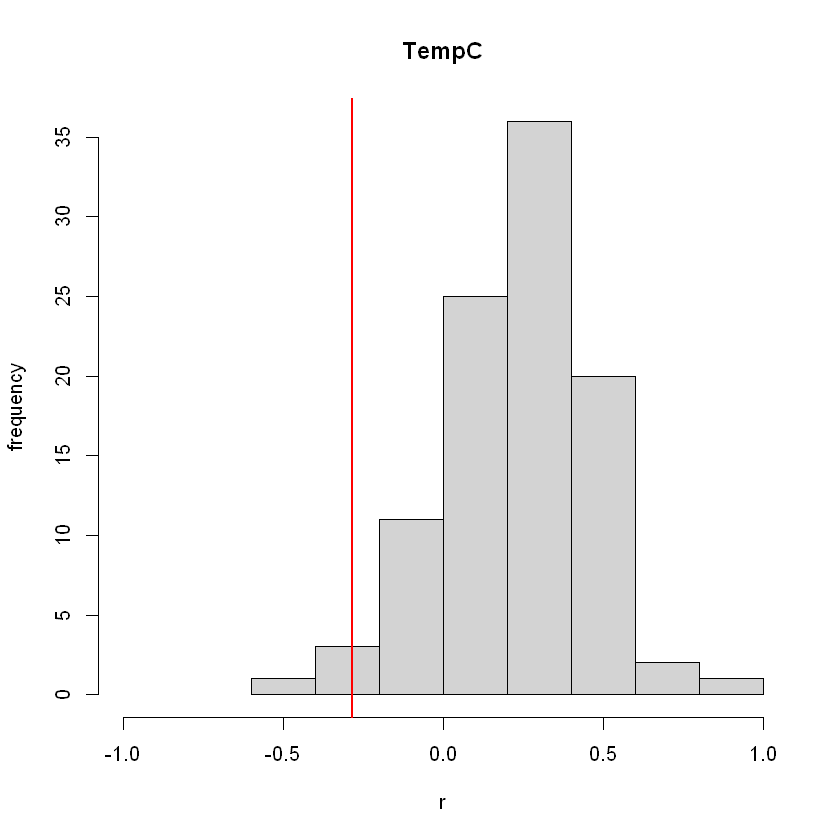

[1] "pH r-squared p: 0.343434343434343"


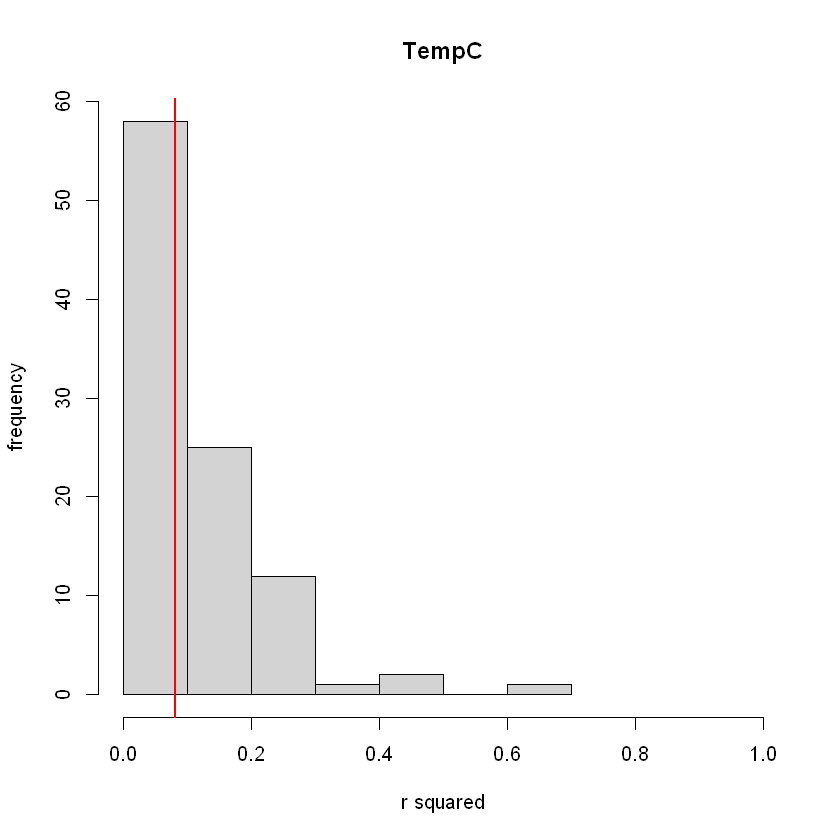

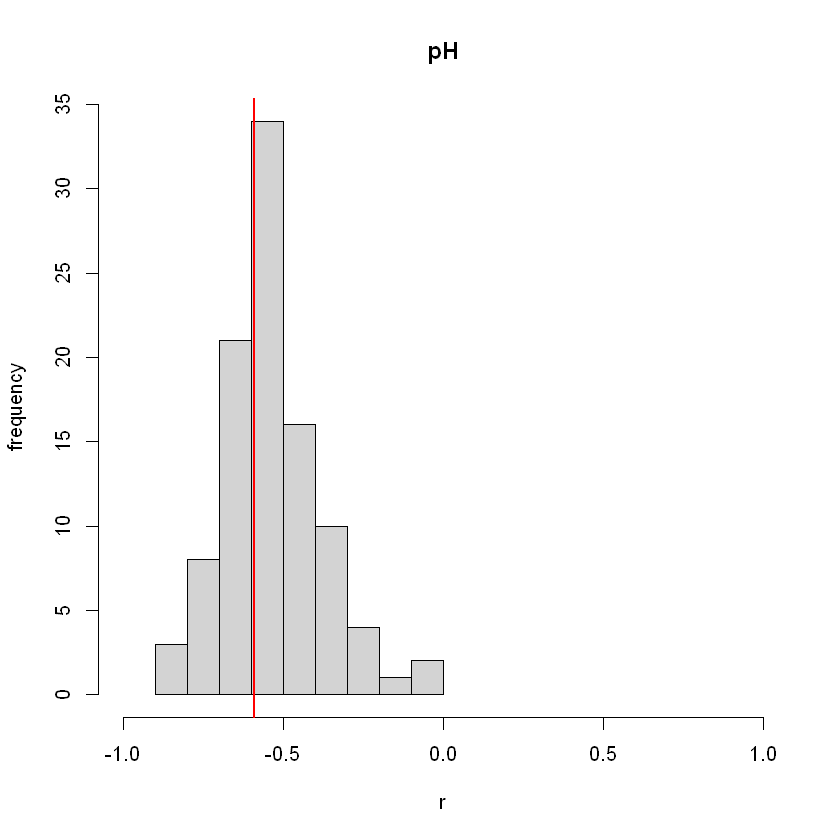

[1] "O2_AQ/H2O r-squared p: 0"


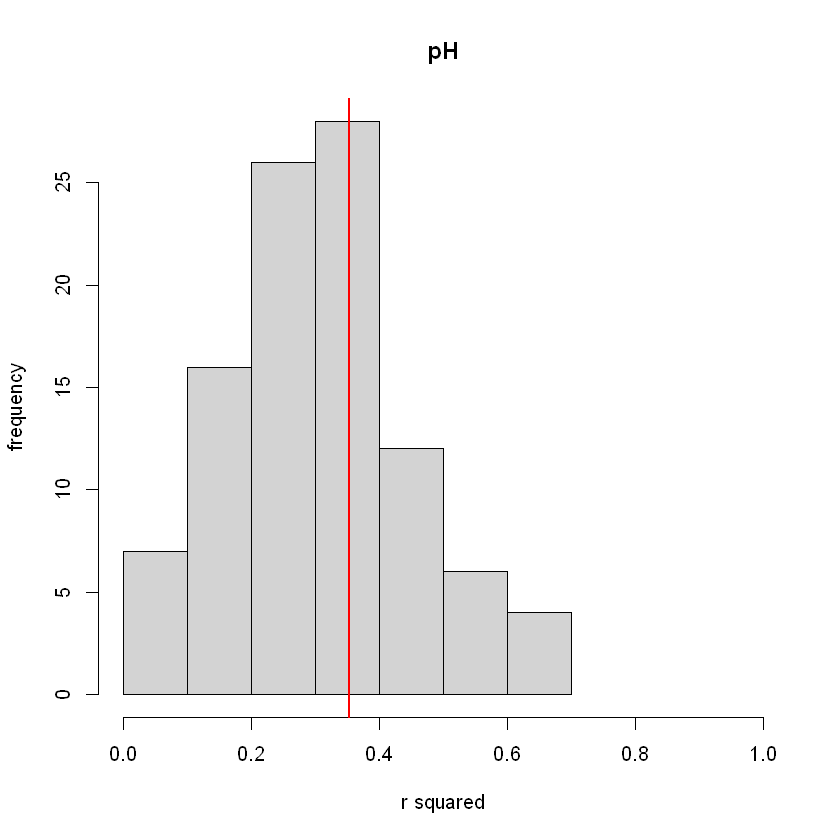

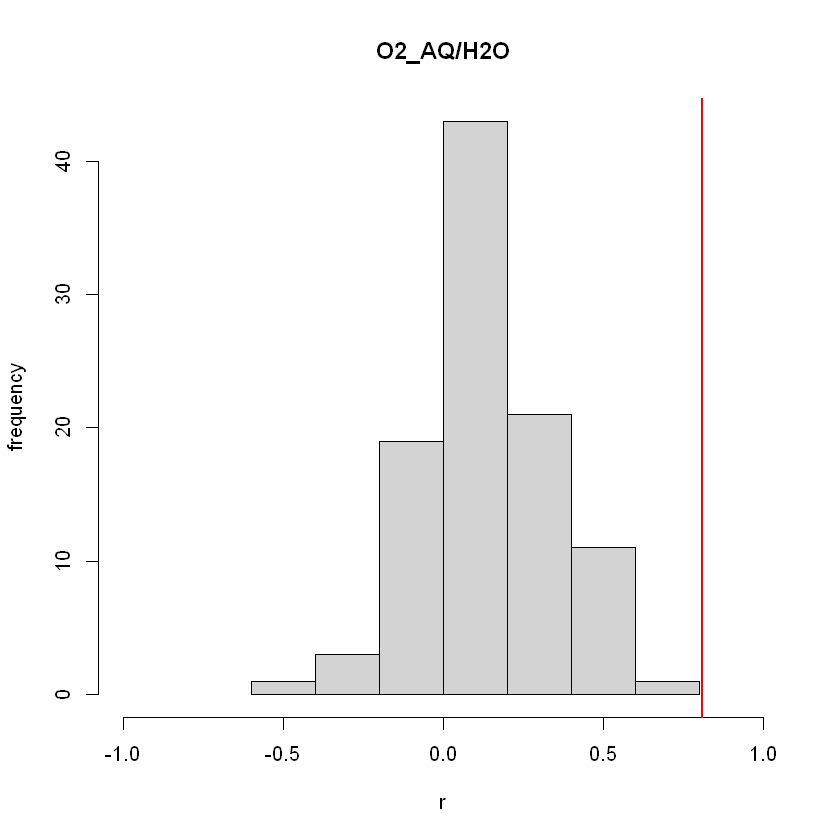

[1] "NO2-/NO3- r-squared p: 0.0101010101010101"


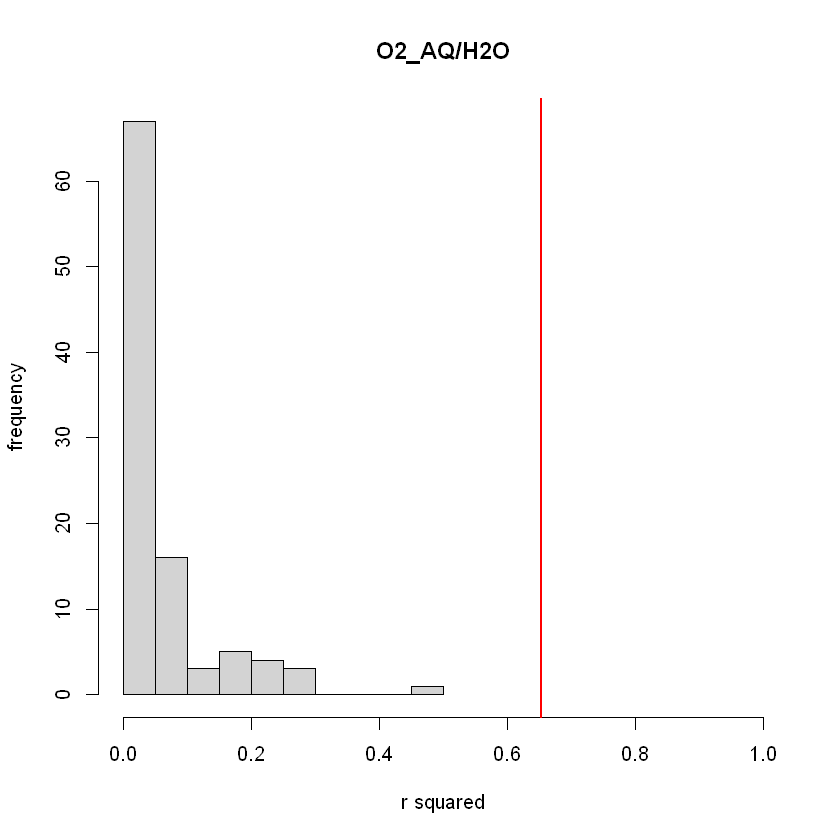

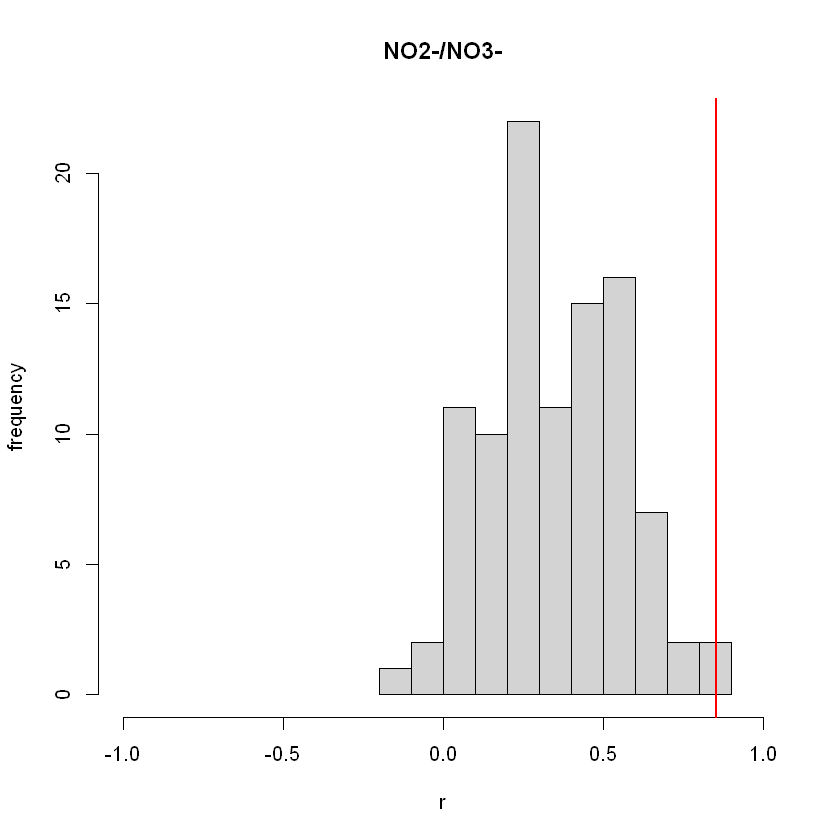

[1] "NH4+/NO3- r-squared p: 0"


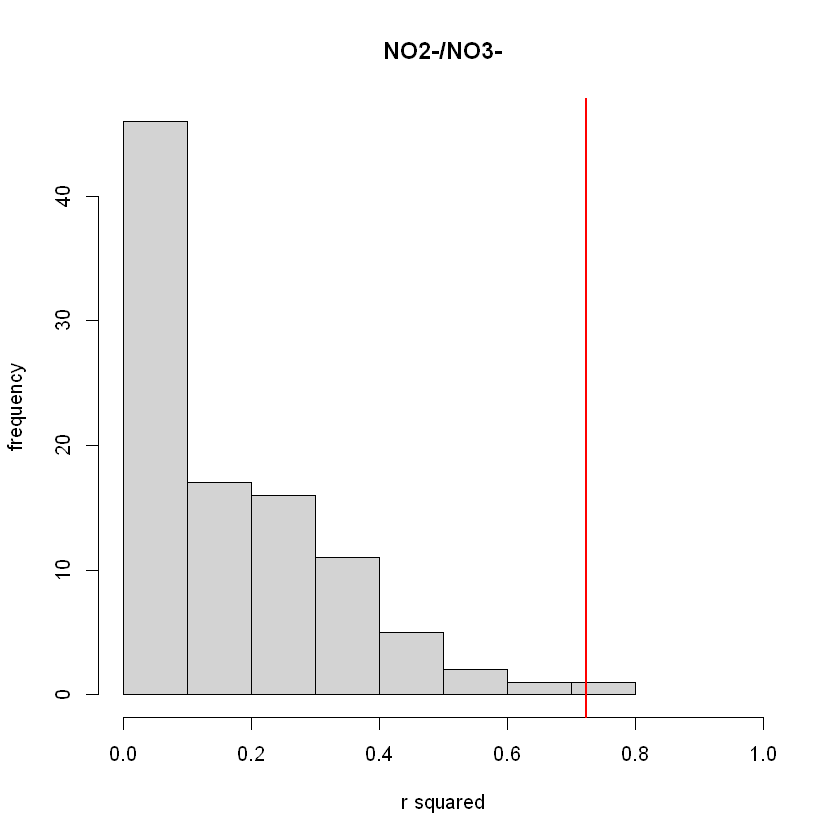

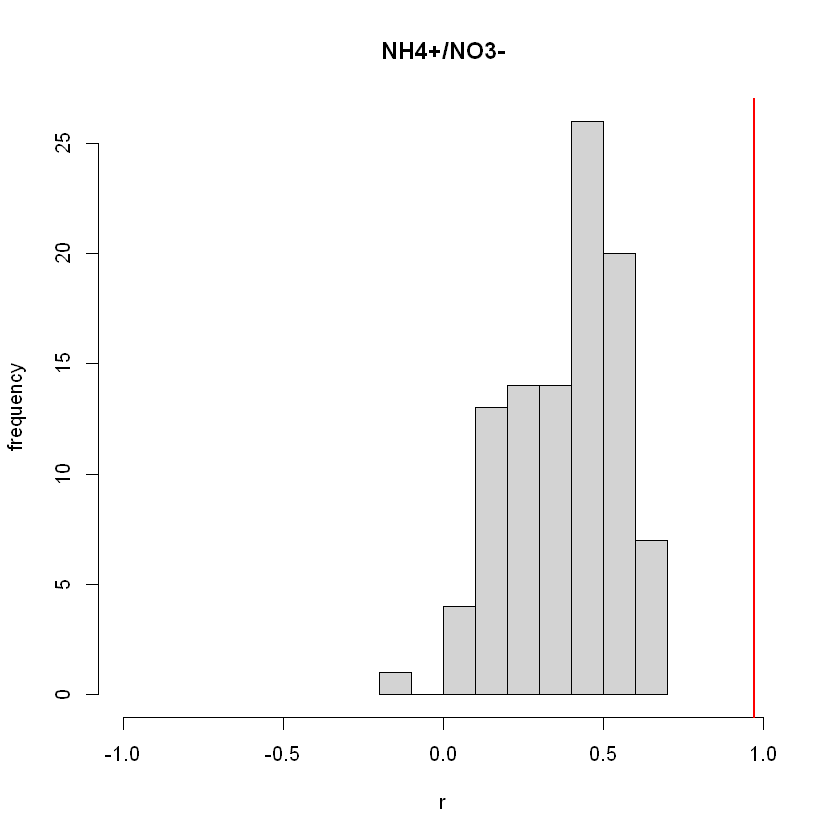

[1] "HS-/SO4-2 r-squared p: 0.0101010101010101"


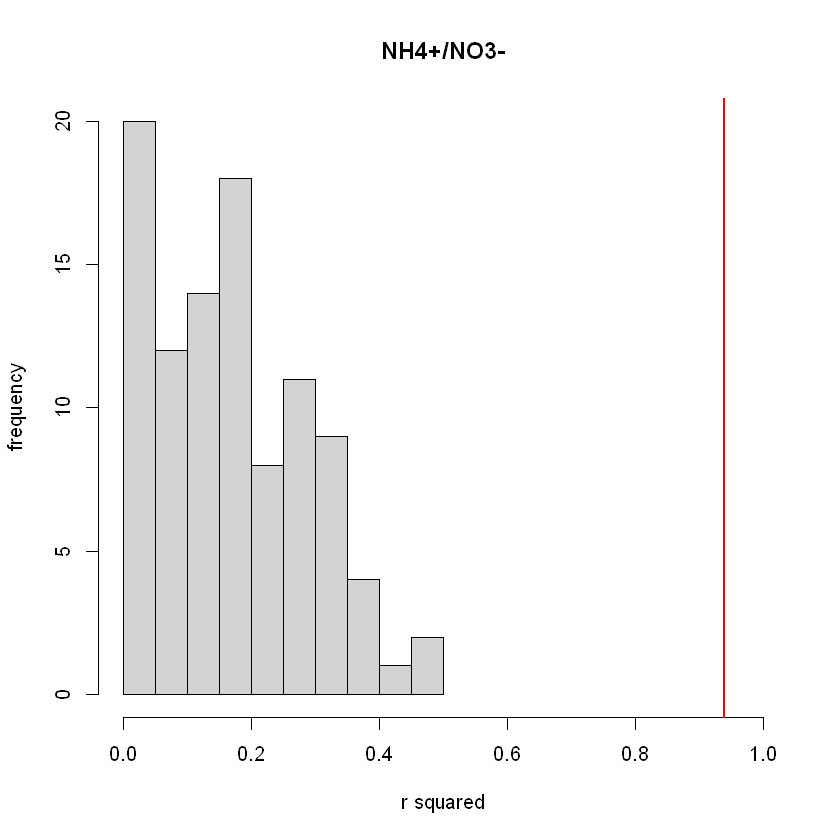

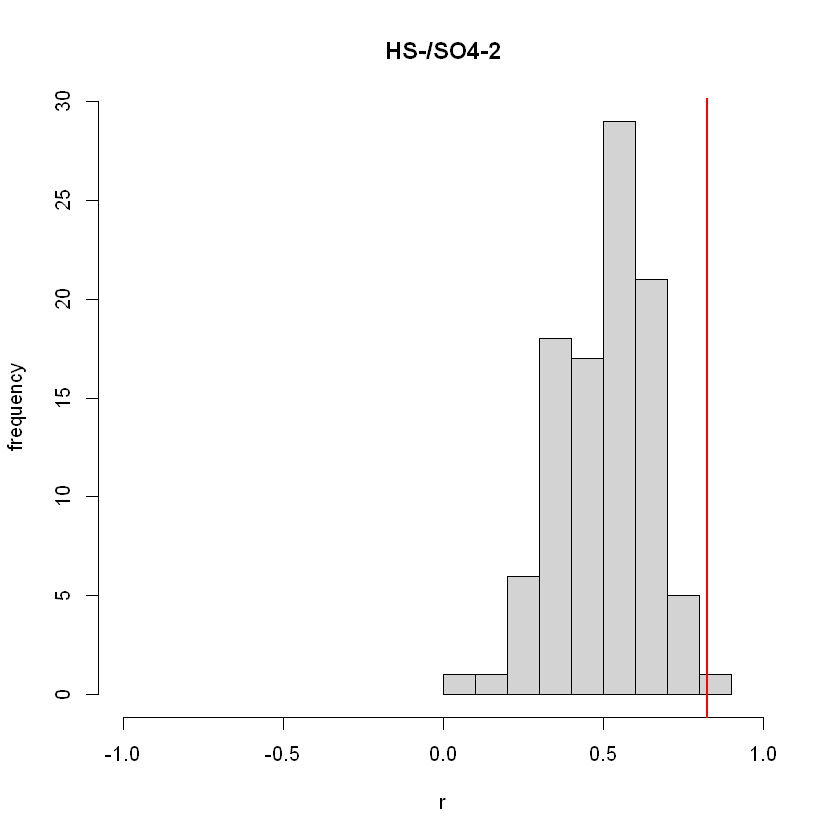

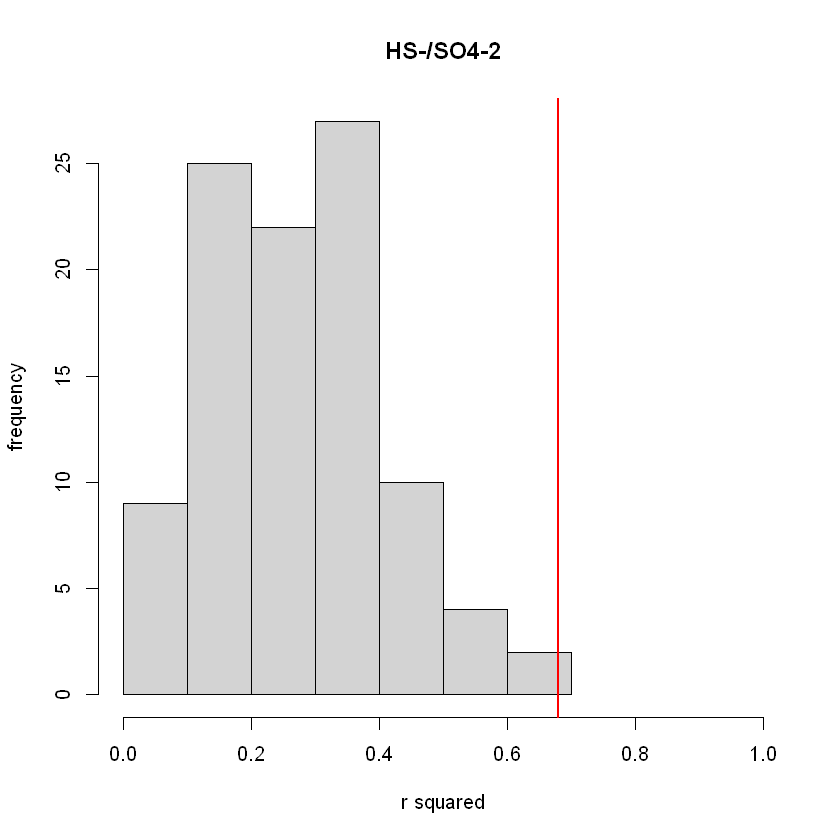

In [41]:
source("scripts//monte_carlo_histogram.r")

In [4]:
water_stability(T=89, P=1, pH=7.235, unit="Eh", which="reducing")

[1] -0.5747128

In [5]:
stopifnot(FALSE)

ERROR: Error: FALSE is not TRUE


### code below might need to be fixed

In [ ]:
# load IPL_master_no_GDGTs
IPL_master <- readRDS("rds//IPL_master_no_GDGTs.rds")
table_name <- "table - alkyl chain predicted no GDGTs"
fig_scatter_name <- "scatterplot - alkyl chain predicted no GDGTs"

source("scripts//IPL_predict_redox.r")

In [ ]:
# join environmental redox vals with alkyl-prediced redox vals
library("dplyr")
df_redox <- read.csv(paste0("data//env_", pred,".csv"), check.names=FALSE)
lip_redox <- read.csv(paste0("table - alkyl chain predicted no GDGTs ", pred, ".csv"))
write.csv(join(df_redox, lip_redox, by="sample"), paste0("lip_", pred, ".csv"), row.names=FALSE)

# plot redox vs. alkyl-redox
source("scripts//scatterplot - alkyl chain predicted redox.r")

In [ ]:
# library(ggplot2)
sessionInfo()

In [ ]:
t <- readRDS(paste0("monte_calc_", pred, ".rds"))
head(t)

In [ ]:
spring <- "BP1"
print(paste(mean(t[[spring]][["actual"]]), "+/-", sd(t[[spring]][["actual"]])))

In [ ]:
df <- data.frame(sample=character(0), pred_Eh=numeric(0))
for (spring in names(t)){
    for(Eh in t[[spring]][["actual"]]){
        df <- rbind(df, data.frame(sample=spring, pred_Eh=Eh))
    }
}
head(df)

In [ ]:
boxplot(pred_Eh~sample, data=df, ylab=paste(pred, "predicted from alkyl chains"), xlab="sample")

Create a scatterplot of data above vs pe. Shaded area for 95% prediction interval.

In [ ]:
sum(rowSums(readRDS("rds/IPL_master.rds")[["mergedIPL 1"]][["IPLareas"]])==0)

In [ ]:
names(readRDS("rds/IPL_master.rds")[["mergedIPL 1"]])